In [2]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
len(x_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


60000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

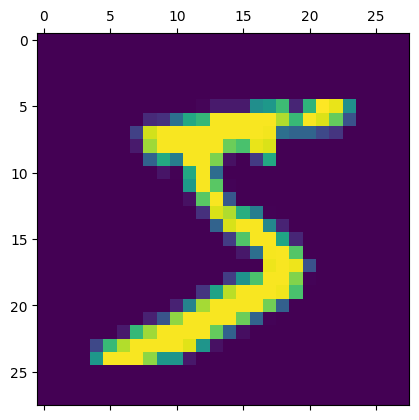

In [6]:
plt.matshow(x_train[0])

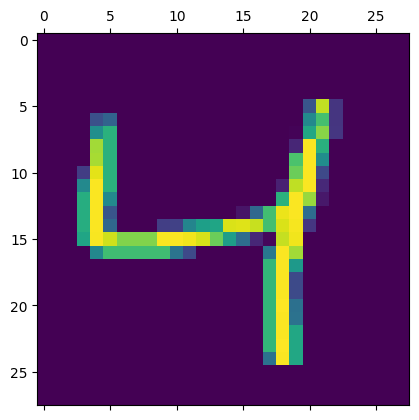

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[2]

np.uint8(4)

In [ ]:
x_train.shape  #28*28 image

(60000, 28, 28)

reduce numbers to less than 1 values to improve the accuracy and scale the data


In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
# Flatten x_test and x_train images
x_test_flat = x_test.reshape(len(x_test), 28*28)  # Reshape to (10000, 784) if x_test has 10000 images
x_train_flat = x_train.reshape(len(x_train), 28*28)

# No need to reshape y_test or y_train since they are labels
y_test_flat = y_test  # Keep the labels as they are
y_train_flat = y_train

x_test_flat.shape

(10000, 784)

In [18]:
x_train_flat[0]#single array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_flat, y_train_flat, epochs=5)

Epoch 1/5


c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 765us/step - accuracy: 0.8045 - loss: 0.7330
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.9147 - loss: 0.3097
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - accuracy: 0.9219 - loss: 0.2798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.9247 - loss: 0.2692
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - accuracy: 0.9272 - loss: 0.2636


In [20]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.9128 - loss: 0.3064


[0.27009332180023193, 0.9247000217437744]

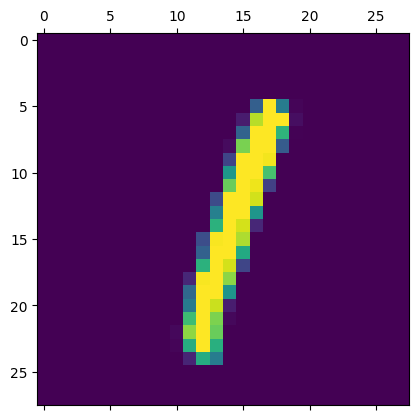

In [21]:
plt.matshow(x_test[5])

In [23]:
y_pred=model.predict(x_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred[5] #outputs of 10 output scores

array([7.3629235e-05, 9.9771732e-01, 5.5130714e-01, 4.1002744e-01,
       6.0764737e-03, 2.0955460e-02, 9.9265724e-03, 5.7307947e-01,
       4.5458212e-01, 1.8369441e-01], dtype=float32)

In [25]:
np.argmax(y_pred[5])

np.int64(1)

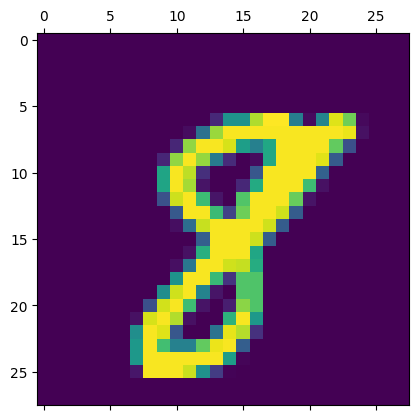

In [26]:
plt.matshow(x_train[55])

In [ ]:
np.argmax(y_pred[55])#prediction went wrong

np.int64(0)

In [32]:
y_pred_labels=[int(np.argmax(i)) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1115,    4,    1,    0,    1,    4,    2,    8,    0],
       [   7,    9,  923,   13,    7,    6,   12,    9,   42,    4],
       [   5,    0,   22,  881,    0,   57,    2,   10,   25,    8],
       [   2,    1,    5,    0,  909,    0,   11,    4,   10,   40],
       [   8,    2,    2,   16,    6,  807,   13,    4,   28,    6],
       [  14,    3,    6,    1,    7,   17,  906,    2,    2,    0],
       [   1,    6,   23,    6,    6,    1,    0,  954,    1,   30],
       [   8,    8,    7,   15,    9,   39,    9,    9,  862,    8],
       [  11,    7,    1,    7,   24,   10,    0,   20,    5,  924]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'actual_value')

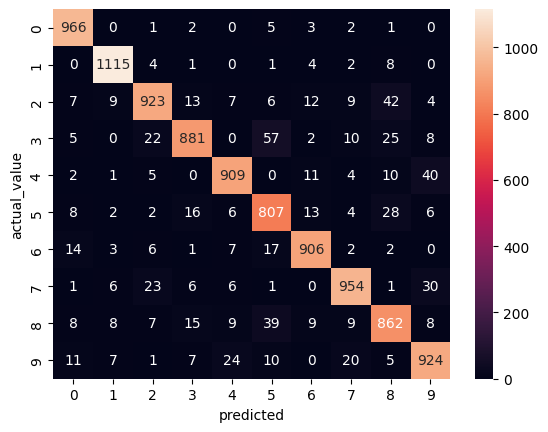

In [39]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("actual_value")

now we add a hidden layer to imporovise the performance

In [40]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model2.fit(x_train_flat, y_train_flat, epochs=5)

c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8721 - loss: 0.4538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9625 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9746 - loss: 0.0854
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0641
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9852 - loss: 0.0500


In [41]:
model2.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9713 - loss: 0.0933


[0.08064517378807068, 0.9757999777793884]

In [45]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#added
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model2.fit(x_train,y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8729 - loss: 0.4524
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9605 - loss: 0.1343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9738 - loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0526
